
#Proyek Analisis Data : E-Commerce Public Dataset


*   Nama        : Akbar Wahyu Pradana
*   Email       : m200b4ky0281@bangkit.academy
*   ID Dicoding : Akbar Wahyu Pradana M200B4KY0281









## Menetukaan Pertanyaan Bisnis



1. Berapa jumlah order (pesanan) setiap State (kota) dan presentasenya?
2. 10 terbanyak order (pesanan) berdasarkan kategori pesananan




## Import Semua Packages/Library yang Digunakan

In [1]:
# Instalasi library yang diperlukan
!pip install pandas
!pip install plotly
!pip install streamlit -q
!pip install pipreqs
# Import library yang diperlukan
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from google.colab import drive

# Memberikan akses ke google drive
drive.mount('/content/gdrive')





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Data Wrangling

### Gathering Data

In [2]:
@st.cache_resource
def load_customers_data():
    return pd.read_csv("/content/gdrive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv", sep=',')

@st.cache_resource
def load_products_data():
    return pd.read_csv("/content/gdrive/MyDrive/E-Commerce Public Dataset/products_dataset.csv", sep=',')

@st.cache_resource
def load_orders_data():
    return pd.read_csv("/content/gdrive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv", sep=',')

In [3]:
customers_data = load_customers_data()
products_data = load_products_data()
orders_data = load_orders_data()

2024-12-22 02:45:38.404 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:38.555 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-22 02:45:38.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:38.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:38.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:38.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:38.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:38.818 Thread 'MainThread': mi

In [4]:
# Memasukkan semua tabel ke dalam list
tables = [customers_data, products_data, orders_data]

# Menggabungkan tabel menggunakan outer join
main_data = pd.concat(tables, axis=1)

Insight:


*   Memuat 3 file data dari google drive mwnggunakan caching untuk menyimpan hasil pemanggilan dataset dan menggabungkannya menjadi satu dataset (main_data) sehingga hanya akan dieksekusi satu kali selama aplikasi Streamlit berjalan.         
*   dengan demilitter"," dataset yang menjadi satu akan kita pisahkan data berdasarkan comma dan kita dapat mengolahnya


###Assesing Data

In [5]:
#Mendeteksi apakah ada missing value pada maindata
print("Missing Values pada main data Dataset")
missing_values_main_data = main_data.isnull().sum()

print(missing_values_main_data)


Missing Values pada main data Dataset
customer_id                   13209
customer_unique_id            13209
customer_zip_code_prefix      13209
customer_city                 13209
customer_state                13209
product_id                    79699
product_category_name         80309
product_name_lenght           80309
product_description_lenght    80309
product_photos_qty            80309
product_weight_g              79701
product_length_cm             79701
product_height_cm             79701
product_width_cm              79701
order_id                          0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
dtype: int64


In [6]:
#Mendeteksi apakah ada duplikat data pada maindata
print("Data Duplikat pada maindata Dataset")
duplikat_main_data = main_data.duplicated().sum()

print(duplikat_main_data)



Data Duplikat pada maindata Dataset
0


Insight:


*   Memiliki Missing Values pada product Dataset. kita dapat mengisinya dengan value lainnya, memprediksi atau menghapusnya. Disini saya akan menghapus baris yang memiliki values yang kosong
*   Memeriksa apakah ada value yang duplikat pada data. Data yang duplikat dapat mempengaruhi visualisasi data dan hasilnya akan kurang tepat     


###Cleaning Data

In [7]:
#Disini saya hanya cleaning dataset products karena hanya dataset ini yang memiliki missing values
main_data = main_data.dropna()

In [8]:
# mengurutkan main data berdasarkan order_id
orders_data_sorted = main_data.sort_values(by='order_id', ascending=True)
print(orders_data_sorted.head())



                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                   14409.0                 franca             SP   
1                    9790.0  sao bernardo do campo             SP   
2                    1151.0              sao paulo             SP   
3                    8775.0        mogi das cruzes             SP   
4                   13056.0               campinas             SP   

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9

Insight:


*   Dengan menghapus values yang duplikat data akan dapat dicisualisasikan secara baik.   
*   Ordeing data pada 3 dataset agar visualisasi data lebih baik       


## Exploratory Data Analysis

### Explore ...

In [9]:
# menampilkan rangkuman parameter statistik
main_data.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,32340,32340,32340.000000,32340,32340,32340,32340,32340.000000,32340.000000,32340.000000,...,32340.000000,32340.000000,32340.000000,32340,32340.000000,32340,32340,32340,32340.000000,32340.000000
unique,32340,31962,NaN,2807,27,32340,73,NaN,NaN,NaN,...,NaN,NaN,NaN,28317,NaN,14634,2312,27910,NaN,NaN
top,06b8999e2fba1a1fbc88172c00ba8bc7,3e43e6105506432c953e165fb2acf44c,NaN,sao paulo,SP,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,...,NaN,NaN,NaN,1b15974a0141d54e36626dca3fdc731a,NaN,422879e10f46682990de24d770e7f83d,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN
freq,1,5,NaN,5114,13550,1,3029,NaN,NaN,NaN,...,NaN,NaN,NaN,20,NaN,151,595,20,NaN,NaN
mean,NaN,NaN,35021.914533,NaN,NaN,NaN,NaN,48.476592,771.492393,2.188961,...,30.854545,16.958813,23.208596,NaN,1.200093,NaN,NaN,NaN,120.460297,20.030920
std,NaN,NaN,29737.976952,NaN,NaN,NaN,NaN,10.245699,635.124831,1.736787,...,16.955965,13.636115,12.078762,NaN,0.710220,NaN,NaN,NaN,185.832871,15.928793
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,5.000000,4.000000,1.000000,...,7.000000,2.000000,6.000000,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,42.000000,339.000000,1.000000,...,18.000000,8.000000,15.000000,NaN,1.000000,NaN,NaN,NaN,39.900000,13.027500
50%,NaN,NaN,24358.000000,NaN,NaN,NaN,NaN,51.000000,595.000000,1.000000,...,25.000000,13.000000,20.000000,NaN,1.000000,NaN,NaN,NaN,74.900000,16.280000
75%,NaN,NaN,58302.000000,NaN,NaN,NaN,NaN,57.000000,972.000000,3.000000,...,38.000000,21.000000,30.000000,NaN,1.000000,NaN,NaN,NaN,134.917500,21.220000


array([[<Axes: title={'center': 'customer_zip_code_prefix'}>,
        <Axes: title={'center': 'product_name_lenght'}>,
        <Axes: title={'center': 'product_description_lenght'}>],
       [<Axes: title={'center': 'product_photos_qty'}>,
        <Axes: title={'center': 'product_weight_g'}>,
        <Axes: title={'center': 'product_length_cm'}>],
       [<Axes: title={'center': 'product_height_cm'}>,
        <Axes: title={'center': 'product_width_cm'}>,
        <Axes: title={'center': 'order_item_id'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>, <Axes: >]],
      dtype=object)

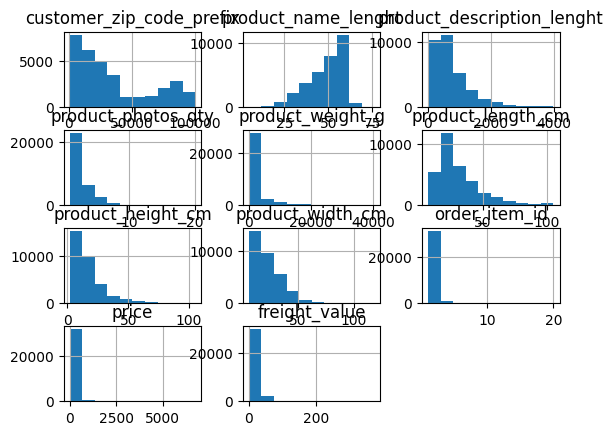

In [10]:
# menampilkan data histogram
main_data.hist()

In [11]:
# Membuat pivot table berdasarkan kolom yang diberikan
pivot_table = main_data.pivot_table(
    values=[
        "product_name_lenght",
        "product_description_lenght",
        "product_photos_qty",
        "product_weight_g",
        "product_length_cm",
        "product_height_cm",
        "product_width_cm"
    ],
    index="product_category_name",
    aggfunc="mean"
)

# Mengatur ulang indeks dan menampilkan pivot table
pivot_table = pivot_table.reset_index()
st.subheader("Pivot Table: Average Product Attributes by Category")
st.write(pivot_table)
print(pivot_table)

2024-12-22 02:45:44.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


        product_category_name  product_description_lenght  product_height_cm  \
0   agro_industria_e_comercio                  807.756757          28.945946   
1                   alimentos                 1136.512195          14.682927   
2           alimentos_bebidas                  983.134615          15.951923   
3                       artes                  678.345455          11.800000   
4          artes_e_artesanato                  620.421053           9.789474   
..                        ...                         ...                ...   
68    sinalizacao_e_seguranca                  816.849462          23.892473   
69   tablets_impressao_imagem                  676.444444           9.444444   
70                  telefonia                  755.327160           6.853616   
71             telefonia_fixa                 1017.387931          10.741379   
72      utilidades_domesticas                  674.179872          22.337901   

    product_length_cm  product_name_len

Insight:


*   Pada pertanyaan bisnis  2 saya menggabungkan harga pesanan (2) jika dibawah atau sama dengan 2% agar visualisasi lebih baik      
*   Kota dengan jumlah order tertinggi adalah State code SP dengan total 41,746 pesanan. Ini menunjukkan bahwa wilayah tersebut adalah pasar utama untuk bisnis.


##Visualization & Explanatory Analysis

###Pertanyaan 1

In [12]:
#Judul Dashboard
st.title("Business Orders Dashboard")

2024-12-22 02:45:44.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [13]:
# Mengelompokkan data berdasarkan state dan menghitung jumlah pesanan
state_order_counts = main_data.groupby("customer_state")["customer_id"].count().reset_index()
state_order_counts.columns = ["State", "Number of Orders"]
state_order_counts = state_order_counts.sort_values(by="Number of Orders", ascending=False)

# Menghitung jumlah total pesanan untuk setiap state
total_orders = state_order_counts['Number of Orders'].sum()

# Mengelompokkan dan menjumlahkan untuk kategori "Other"
state_order_counts_grouped = state_order_counts.groupby('State')['Number of Orders'].sum().reset_index()


In [14]:

# Membuat Header
st.header("1. Kota (State) yang Memiliki Pesanan (Orders) Terbanyak")

# Membuat checkbox untuk semua state untuk filtering
selected_states = st.multiselect(
    "Select States to Filter",
    options=state_order_counts_grouped['State'].unique(),
    default=state_order_counts_grouped['State'].unique()[:2]  # Default to first two states
)

# Membuat slider untuk filtering range order
min_orders, max_orders = st.slider(
    "Select the range of Number of Orders",
    min_value=int(state_order_counts_grouped['Number of Orders'].min()),
    max_value=int(state_order_counts_grouped['Number of Orders'].max()),
    value=(0, int(state_order_counts_grouped['Number of Orders'].max()))  # Default to full range
)

# Filter data berdasarkan filter di atas
filtered_data = state_order_counts_grouped[
    (state_order_counts_grouped['State'].isin(selected_states)) &
    (state_order_counts_grouped['Number of Orders'].between(min_orders, max_orders))
]

# Menampilkan data yang telah ter-filter
st.subheader("Filtered States by Number of Orders")
st.write(filtered_data)

# Membuat pie chart untuk states yang telah ter-filter
fig_pie_chart = px.pie(
    filtered_data,
    values="Number of Orders",
    names="State",
    title="States Contribution by Number of Orders (Filtered)",
    hole=0.4,
    labels={'State':'State', 'Number of Orders':'Number of Orders'},
    hover_data=["Number of Orders"]
)

# Menampilkan pie chart
st.subheader("Pie Chart: Filtered States by Number of Orders")
st.plotly_chart(fig_pie_chart)


2024-12-22 02:45:44.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.372 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:44.390 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

### Pertanyaan 2

In [15]:

# Mengelompokkan berdasarkan kategori produk dan menghitung total harga pesanan
category_price_totals = main_data.groupby("product_category_name")["price"].sum().reset_index()
category_price_totals.columns = ["Product Category", "Total Order Price"]
category_price_totals = category_price_totals.sort_values(by="Total Order Price", ascending=False)

# Menghitung jumlah total harga pesanan untuk setiap kategori produk
total_price = category_price_totals['Total Order Price'].sum()

# Menghitung persentase dan menggabungkan yang kurang dari 2% menjadi "Other"
category_price_totals['Percentage'] = (category_price_totals['Total Order Price'] / total_price) * 100
category_price_totals['Product Category'] = category_price_totals['Product Category'].where(category_price_totals['Percentage'] >= 2, 'Other')

# Mengelompokkan dan menjumlahkan untuk kategori "Other"
category_price_totals_grouped = category_price_totals.groupby('Product Category')['Total Order Price'].sum().reset_index()

# Membuat pie chart untuk semua kategori produk dengan kategori "Other"
fig_pie_chart_category = px.pie(
    category_price_totals_grouped,
    values="Total Order Price",
    names="Product Category",
    title="Product Categories Contribution by Total Order Price (Including 'Other'[sum that below 2%])",
    hole=0.4,
    labels={'Product Category':'Product Category', 'Total Order Price':'Total Order Price'},
    hover_data=["Total Order Price"]
)


In [16]:

# Menampilkan subheader
st.header("2. Berapa Total Harga Pesanan per Kategori Produk?")

# Menampilkan 10 kategori teratas berdasarkan total harga pesanan
st.subheader("Top 10 Product Categories by Total Order Price")
st.write(category_price_totals.head(10))

# Membuat bar chart untuk total harga berdasarkan kategori produk
fig_category_price = px.bar(
    category_price_totals.head(10),
    x="Product Category",
    y="Total Order Price",
    title="Top 10 Product Categories by Total Order Price",
    color="Total Order Price"
)

st.plotly_chart(fig_category_price)

# Menampilkan diagram pie dengan persentase kontribusi
st.subheader("Pie Chart: Top 10 Product Categories by Total Order Price")

# Menampilkan pie chart di Streamlit
st.plotly_chart(fig_pie_chart_category)


2024-12-22 02:45:45.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:45.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:45.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:45.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:45.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:45.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:45.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-22 02:45:45.481 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

Insight:


*   Pengguna dapat memilih provinsi tertentu untuk memfilter data pesanan, membantu menganalisis pesanan dari wilayah tertentu.
*   Slider memungkinkan pengguna untuk menetapkan rentang jumlah pesanan, fokus pada kelompok volume tertentu.
*   Gabungan tabel dan grafik memberikan representasi numerik dan visual dari data pesanan yang telah difilter.


##Conclusion

1. 5 kota (state) yang memiliki pesanan (orders) terbanyak secara berturut-urut adalah  

<table>
    <tr>
        <th>Kode State</th>
        <th>Total</th>
        <th>Persen</th>
    </tr>
    <tr>
        <td>SP</td>
        <td>41,746</td>
        <td>42% </td>
    </tr>
    <tr>
        <td>RJ</td>
        <td>12,852</td>
        <td>12.9% </td>
    </tr>
    <tr>
        <td>MG</td>
        <td>11,635</td>
        <td>11.7% </td>
    </tr>
    <tr>
        <td>RS</td>
        <td>5,466</td>
        <td> 5.5%</td>
    </tr>
    <tr>
        <td>PR</td>
        <td>5,045</td>
        <td>5.07% </td>
    </tr>
</table>


2. Berapa total harga pesanan per kategori produk?  


<table>
    <tr>
        <th>Kategori</th>
        <th>Total Harga</th>
        <td>Persen </td>
    </tr>
    <tr>
        <td>beleza_saude</td>
        <td>1,258,681.34</td>
        <td>9.38% </td>
    </tr>
    <tr>
        <td>relogios_presentes</td>
        <td>1,205,005.68</td>
        <td>8.98% </td>
    </tr>
    <tr>
        <td>cama_mesa_banho</td>
        <td>1,036,988.68</td>
        <td>7.73% </td>
    </tr>
    <tr>
        <td>esporte_lazer</td>
        <td>988,048.97</td>
        <td>7.37% </td>
    </tr>
    <tr>
        <td>informatica_acessorios</td>
        <td>911,954.32</td>
        <td>6.8% </td>
    </tr>
    <tr>
        <td>moveis_decoracao</td>
        <td>729,762.49</td>
        <td>5.44% </td>
    </tr>
    <tr>
        <td>cool_stuff</td>
        <td>635,290.85</td>
        <td>4.74% </td>
    </tr>
    <tr>
        <td>utilidades_domesticas</td>
        <td>632,248.66</td>
        <td>4.71% </td>
    </tr>
    <tr>
        <td>automotivo</td>
        <td>592,720.11</td>
        <td>4.42% </td>
    </tr>
    <tr>
        <td>ferramentas_jardim</td>
        <td>485,256.46</td>
        <td>3.62% </td>
    </tr>
</table>